# 가설검정

In [4]:
from scipy import stats
import numpy as np
import pandas as pd

## 1) 단일집단 t검정
- 단일집단의 평균이 어떤 특정한 집단의 평균과 차이가 있는지 검정하는 방법

<br/>

### Example
국내 생산 노트북 평균 사용시간이 5.2시간으로 파악된 상황.   
A회사 노트북 평균 사용시간과 차이가 있는지 검정하기 위해 150대를 랜덤 선정하여 검정 실시

- 귀무가설: 평균시간의 차이가 없다
- 대립가설: 평균시간의 차이가 있다

##### 절차
샤피로 테스트의 검정결과 유의수준 >0.05이면 정규분포로 판단하고 t-test를 수행  
그렇지 않은 경우, 월콕스 테스트를 진행

<br/>

### 샤피로 테스트의 귀무가설 : 해당 표본은 정규분포와 차이가 없다

In [7]:
np.random.seed(100)
onesample=np.round(np.random.normal(5.1,1,150),1)  #회사의 노트북 사용 시간

In [8]:
onesample

array([3.4, 5.4, 6.3, 4.8, 6.1, 5.6, 5.3, 4. , 4.9, 5.4, 4.6, 5.5, 4.5,
       5.9, 5.8, 5. , 4.6, 6.1, 4.7, 4. , 6.7, 6.6, 4.8, 4.3, 5.3, 6. ,
       5.8, 6.5, 4.8, 5.2, 5.3, 3.7, 4.3, 5.9, 5.9, 4.6, 6.3, 3.4, 3.7,
       3.9, 4.6, 4.4, 5.1, 4.5, 6.4, 3.4, 4.1, 5.5, 3.5, 6.6, 3.9, 4.6,
       4.2, 4.3, 5.2, 5.6, 4.2, 6.3, 5. , 4.2, 4.2, 5.1, 5.3, 5.1, 3.5,
       4.1, 5.7, 5.8, 6.1, 3.7, 3.3, 5.5, 4.8, 4.4, 7.1, 4.5, 5.9, 3.8,
       5.7, 4. , 5.8, 5.8, 3.5, 6. , 5.9, 5.5, 5.2, 5.1, 4.5, 3.9, 3.4,
       5.5, 7. , 4.7, 6.9, 5.1, 5. , 5.1, 4.9, 2.6, 3.4, 4. , 2.1, 5.1,
       4.9, 4.6, 5.2, 5.1, 5.4, 4.3, 3.8, 5.2, 4.7, 3.9, 4.7, 3.8, 6.7,
       5.8, 3.1, 5. , 3.6, 7.1, 3.7, 4. , 4.9, 3.7, 6. , 5.1, 6. , 5.9,
       3.6, 3.9, 6.4, 6.1, 3.9, 4.9, 3.6, 5.2, 5.8, 5.5, 3.7, 4.5, 5.9,
       4.7, 7.2, 4.8, 4.5, 5.9, 5.3, 4.8])

- 표본의 갯수가 150개로 충분하기 때문에 정규분포를 따를것임

In [9]:
# 샤피로 테스트 수행
static,p=stats.shapiro(onesample)

In [10]:
p

0.3446153700351715

### 결과
p-value=0.344이므로 0.05보다 매우 크기 때문에 귀무가설을 기각할 수 없음.   
따라서 정규분포를 따른다. 즉 t-test수행!!

In [11]:
stats.ttest_1samp(onesample,5.2)

Ttest_1sampResult(statistic=-3.214946711763571, pvalue=0.0015999004385247695)

### Result
t-test시행 결과 p-value는 0.0015<0.05이므로 귀무가설을 기각. 대립가설을 채택  
따라서 A회사의 노트북과 국내 생산 노트북의 평균 시간은 차이가 있다.

##  2) 두 집단 평균 차이 검정 
levene() ( 등분산 검정 ) 를 이용해 두 집단의 분포가 동질한지 검정하고 동질하면 equal_var=True  
동질하지 않으면 equal_var=False로 진행

- 귀무가설 : 두 집단의 분포는 차이가 없다 (동질하다)

<br/>

### Example

A공정을 통한 재료의 강도와 B공정을 통한 재료의 강도를 각각 50개의 표본으로 조사했음   
두 집단의 강도에 차이가 있는가?

- 귀무가설: 두 집단의 평균은 차이가 없다

In [3]:
np.random.seed(50)
a=np.random.choice(range(100,131),50)
b=np.random.choice(range(90,140),50)

In [4]:
stats.levene(a,b)

LeveneResult(statistic=10.455556028067193, pvalue=0.0016668365977815338)

### Result
p-value=0.0016 < 0.05이므로 두 집단의 분포는 동질하지 않다. 
--> equal_var=False

In [5]:
stats.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=-0.37348367924784004, pvalue=0.7097345147148231)

### Result
p-value=0.7097>0.05이므로 귀무가설을 채택. 따라서 두 집단의 평균의 차이는 없다

## 3) 카이제곱 검정

In [5]:
ad=pd.read_csv('ad.csv')

In [6]:
ad.head(4)

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다


In [8]:
ad.info() # 1000개의 데이터 가짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
광고    1000 non-null object
구입    1000 non-null object
dtypes: object(2)
memory usage: 15.8+ KB


In [11]:
ad_cross=pd.crosstab(ad['광고'], ad['구입'])

In [12]:
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [9]:
chi2_static=81/360+81/40+81/540+81/60 # 카이제곱 통계량
chi2_static

3.75

H0 : 광고가 구매에 영향을 미쳤는지 

In [19]:
chic2, p,dof,ef=stats.chi2_contingency(ad_cross, correction=False) # correction =False : p-value더 낮게 생성해줌 

In [20]:
p #p-value

0.052807511416113395

In [21]:
ef 

array([[360.,  40.],
       [540.,  60.]])

In [24]:
chic2 # 위의 직접 구한 카이제곱 통계량과 같음을 알 수 있음

3.75

In [25]:
dof #자유도

1

# 그래프
## 자유도가 1인 카이제곱 분포를 따르는 확률변수 생성

In [31]:
import matplotlib.pyplot as plt

In [26]:
xs=np.linspace(0,10,50)

In [27]:
# 자유도 1인 카이제곱 분포를 따르는 확률변수 생성
rv=stats.chi2(1)

In [28]:
# 유의수준 0.05일때 카이제곱 통계량
rv.isf(0.05)

3.8414588206941285

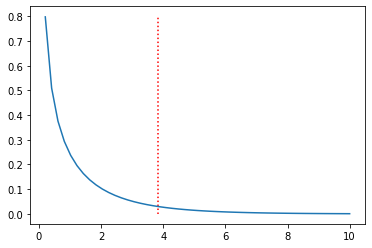

In [32]:
plt.plot(xs,rv.pdf(xs))
plt.vlines(rv.isf(0.05),ymin=0,ymax=0.8,color='r',ls=':')

## Result
- 유의 수준이 0.05일때 카이제곱통계량이 3.8정도가 됌

## 4) Example - 주사위 게임 (일원카이제곱)
친구A가 가져온 주사위로 몰래 혼자 게임을 실시  
이 주사위로 A와 내기를 해야할까?

In [33]:
freq=[16,7,7,15,11,4] # 던진 횟수( 주사위 6개)

In [34]:
stats.chisquare(freq) # 자유도가 5인 카이제곱 분포를 따름 ( 1-5까지 결정하면 나머지 1개는 자동으로 결정되기 때문에 자유도 5)

Power_divergenceResult(statistic=11.6, pvalue=0.040699388504049985)

In [35]:
#카이제곱 통계량 구하기
np.sum((np.array(freq)-10)**2/10) # 기대빈도는 모든 주사위 칸이 동일하게 나와야하므로 10임

11.6

## Result
p-value=0.04<0.05이므로 관측빈도와 기대빈도는 차이가 없다는 귀무가설이 의심

### +
A가 주사위를 조작하지는 않았을까?

In [36]:
xs=np.linspace(0.30,100)

In [37]:
# 자유도 1인 카이제곱 분포 따르는 확률변수 생성
rv=stats.chi2(5)

In [38]:
# 유의수준 0.05일 때 카이제곱 통계량
rv.isf(0.05)

11.070497693516355

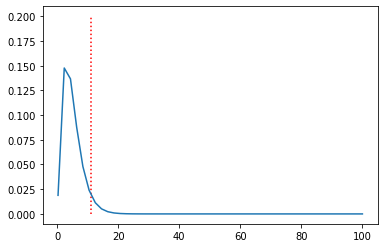

In [40]:
plt.plot(xs,rv.pdf(xs))
plt.vlines(rv.isf(0.05),ymin=0,ymax=0.2,colors='r',ls=':')